<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings

# Data Gathering

In [356]:
df = pd.read_csv("car_dataset.csv")

# Data Preparation

In [357]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Car_Name,ritz,sx4,ciaz,wagon r,swift,vitara brezza,ciaz,s cross,ciaz,ciaz,alto 800,ciaz,ciaz,ertiga,dzire,ertiga,ertiga,ertiga,wagon r,sx4,alto k10,ignis,sx4,alto k10,wagon r,swift,swift,swift,alto k10,ciaz,ritz,ritz,swift,ertiga,dzire,sx4,dzire,800,alto k10,sx4,baleno,alto k10,sx4,dzire,omni,ciaz,ritz,wagon r,ertiga,ciaz,...,city,brio,city,city,brio,city,city,city,amaze,city,brio,amaze,jazz,amaze,jazz,amaze,city,brio,city,city,city,city,jazz,brio,city,city,city,jazz,city,brio,city,city,city,brio,jazz,jazz,amaze,city,city,amaze,brio,jazz,city,amaze,city,city,brio,city,city,brio
Year,2014,2013,2017,2011,2014,2018,2015,2015,2016,2015,2017,2015,2015,2015,2009,2016,2015,2016,2015,2010,2016,2017,2011,2014,2013,2011,2013,2017,2010,2015,2012,2011,2014,2014,2014,2011,2015,2003,2016,2003,2016,2014,2008,2014,2012,2014,2013,2006,2015,2017,...,2013,2015,2014,2013,2012,2016,2015,2015,2014,2016,2016,2015,2016,2015,2017,2014,2016,2017,2015,2011,2009,2015,2010,2014,2016,2015,2015,2016,2014,2015,2006,2014,2016,2013,2016,2016,2015,2015,2016,2014,2015,2016,2010,2014,2015,2016,2015,2009,2017,2016
Selling_Price,3.35,4.75,7.25,2.85,4.6,9.25,6.75,6.5,8.75,7.45,2.85,6.85,7.5,6.1,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.9,4.4,2.5,2.9,3.0,4.15,6.0,1.95,7.45,3.1,2.35,4.95,6.0,5.5,2.95,4.65,0.35,3.0,2.25,5.85,2.55,1.95,5.5,1.25,7.5,2.65,1.05,5.8,7.75,...,5.0,5.4,7.2,5.25,3.0,10.25,8.5,8.4,3.9,9.15,5.5,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.6,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.2,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,...,9.9,6.82,9.9,9.9,5.35,13.6,13.6,13.6,7.0,13.6,5.97,5.8,7.7,7.0,8.7,7.0,9.4,5.8,10.0,10.0,10.0,10.0,7.5,6.8,13.6,13.6,13.6,8.4,13.6,5.9,7.6,14.0,11.8,5.9,8.5,7.9,7.5,13.6,13.6,6.4,6.1,8.4,9.9,6.8,13.09,11.6,5.9,11.0,12.5,5.9
Kms_Driven,27000,43000,6900,5200,42450,2071,18796,33429,20273,42367,2135,51000,15000,26000,77427,43000,41678,43000,35500,41442,25000,2400,50000,45280,56879,20000,55138,16200,44542,45000,51439,54200,39000,45000,45000,49998,48767,127000,10079,62000,24524,46706,58000,45780,50000,15000,64532,65000,25870,37000,...,56701,31427,48000,54242,53675,49562,40324,25000,36054,29223,5600,40023,16002,40026,21200,35000,19434,19000,18828,69341,69562,27600,61203,16500,30753,24800,21780,4000,40126,14465,50456,63000,9010,9800,15059,28569,44000,34000,10980,19000,31427,12000,38000,33019,60076,33988,60000,87934,9000,5464
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,Petrol,Diesel,Petrol,Petrol,Petrol,Diesel,Diesel,Diesel,CNG,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,CNG,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,...,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Petrol,Diesel,Petrol
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Individual,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Indi

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [359]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [360]:
df["Age"] = 2018 - df["Year"]

In [361]:
df["Age"].value_counts()

3     61
2     50
4     38
1     35
5     33
6     23
7     19
8     15
10     7
9      6
12     4
13     4
15     2
11     2
0      1
14     1
Name: Age, dtype: int64

In [362]:
df.drop("Year", axis = 1, inplace=True)

In [363]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [364]:
df.drop("Car_Name", axis = 1, inplace=True)

In [365]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [366]:
df[["Fuel_Type_diesel", "Fuel_Type_Petrol"]] = pd.get_dummies(df.Fuel_Type, drop_first=True)

In [367]:
df["Transmission_Manual"] = pd.get_dummies(df.Transmission , drop_first=True)

In [368]:
df["Seller_Type_Individual"] = pd.get_dummies(df.Seller_Type , drop_first=True)

In [369]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Selling_Price,3.35,4.75,7.25,2.85,4.6,9.25,6.75,6.5,8.75,7.45,2.85,6.85,7.5,6.1,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.9,4.4,2.5,2.9,3.0,4.15,6.0,1.95,7.45,3.1,2.35,4.95,6.0,5.5,2.95,4.65,0.35,3.0,2.25,5.85,2.55,1.95,5.5,1.25,7.5,2.65,1.05,5.8,7.75,...,5.0,5.4,7.2,5.25,3.0,10.25,8.5,8.4,3.9,9.15,5.5,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.6,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.2,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,...,9.9,6.82,9.9,9.9,5.35,13.6,13.6,13.6,7.0,13.6,5.97,5.8,7.7,7.0,8.7,7.0,9.4,5.8,10.0,10.0,10.0,10.0,7.5,6.8,13.6,13.6,13.6,8.4,13.6,5.9,7.6,14.0,11.8,5.9,8.5,7.9,7.5,13.6,13.6,6.4,6.1,8.4,9.9,6.8,13.09,11.6,5.9,11.0,12.5,5.9
Kms_Driven,27000,43000,6900,5200,42450,2071,18796,33429,20273,42367,2135,51000,15000,26000,77427,43000,41678,43000,35500,41442,25000,2400,50000,45280,56879,20000,55138,16200,44542,45000,51439,54200,39000,45000,45000,49998,48767,127000,10079,62000,24524,46706,58000,45780,50000,15000,64532,65000,25870,37000,...,56701,31427,48000,54242,53675,49562,40324,25000,36054,29223,5600,40023,16002,40026,21200,35000,19434,19000,18828,69341,69562,27600,61203,16500,30753,24800,21780,4000,40126,14465,50456,63000,9010,9800,15059,28569,44000,34000,10980,19000,31427,12000,38000,33019,60076,33988,60000,87934,9000,5464
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,Petrol,Diesel,Petrol,Petrol,Petrol,Diesel,Diesel,Diesel,CNG,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Diesel,Diesel,CNG,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,...,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Diesel,Petrol,Petrol,Diesel,Petrol
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Individual,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Individual,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,...,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Automatic,...,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Manual,Automatic,Manual,Automa

In [370]:
df.drop(["Fuel_Type", "Seller_Type", "Transmission"], axis = 1, inplace=True)

In [371]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Selling_Price,3.35,4.75,7.25,2.85,4.60,9.25,6.75,6.50,8.75,7.45,2.85,6.85,7.50,6.10,2.25,7.75,7.25,7.75,3.25,2.65,2.85,4.90,4.40,2.50,2.90,3.00,4.15,6.00,1.95,7.45,3.10,2.35,4.95,6.00,5.50,2.95,4.65,0.35,3.00,2.25,5.85,2.55,1.95,5.50,1.25,7.50,2.65,1.05,5.80,7.75,...,5.0,5.40,7.2,5.25,3.00,10.25,8.5,8.4,3.9,9.15,5.50,4.0,6.6,4.0,6.5,3.65,8.35,4.8,6.7,4.1,3.0,7.5,2.25,5.3,10.9,8.65,9.7,6.0,6.25,5.25,2.1,8.25,8.99,3.5,7.4,5.65,5.75,8.4,10.11,4.5,5.4,6.4,3.25,3.75,8.55,9.5,4.0,3.35,11.5,5.3
Present_Price,5.59,9.54,9.85,4.15,6.87,9.83,8.12,8.61,8.89,8.92,3.60,10.38,9.94,7.71,7.21,10.79,10.79,10.79,5.09,7.98,3.95,5.71,8.01,3.46,4.41,4.99,5.87,6.49,3.95,10.38,5.98,4.89,7.49,9.95,8.06,7.74,7.20,2.28,3.76,7.98,7.87,3.98,7.15,8.06,2.69,12.04,4.89,4.15,7.71,9.29,...,9.9,6.82,9.9,9.90,5.35,13.60,13.6,13.6,7.0,13.60,5.97,5.8,7.7,7.0,8.7,7.00,9.40,5.8,10.0,10.0,10.0,10.0,7.50,6.8,13.6,13.60,13.6,8.4,13.60,5.90,7.6,14.00,11.80,5.9,8.5,7.90,7.50,13.6,13.60,6.4,6.1,8.4,9.90,6.80,13.09,11.6,5.9,11.00,12.5,5.9
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00,2071.00,18796.00,33429.00,20273.00,42367.00,2135.00,51000.00,15000.00,26000.00,77427.00,43000.00,41678.00,43000.00,35500.00,41442.00,25000.00,2400.00,50000.00,45280.00,56879.00,20000.00,55138.00,16200.00,44542.00,45000.00,51439.00,54200.00,39000.00,45000.00,45000.00,49998.00,48767.00,127000.00,10079.00,62000.00,24524.00,46706.00,58000.00,45780.00,50000.00,15000.00,64532.00,65000.00,25870.00,37000.00,...,56701.0,31427.00,48000.0,54242.00,53675.00,49562.00,40324.0,25000.0,36054.0,29223.00,5600.00,40023.0,16002.0,40026.0,21200.0,35000.00,19434.00,19000.0,18828.0,69341.0,69562.0,27600.0,61203.00,16500.0,30753.0,24800.00,21780.0,4000.0,40126.00,14465.00,50456.0,63000.00,9010.00,9800.0,15059.0,28569.00,44000.00,34000.0,10980.00,19000.0,31427.0,12000.0,38000.00,33019.00,60076.00,33988.0,60000.0,87934.00,9000.0,5464.0
Owner,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0
Age,4.00,5.00,1.00,7.00,4.00,0.00,3.00,3.00,2.00,3.00,1.00,3.00,3.00,3.00,9.00,2.00,3.00,2.00,3.00,8.00,2.00,1.00,7.00,4.00,5.00,7.00,5.00,1.00,8.00,3.00,6.00,7.00,4.00,4.00,4.00,7.00,3.00,15.00,2.00,15.00,2.00,4.00,10.00,4.00,6.00,4.00,5.00,12.00,3.00,1.00,...,5.0,3.00,4.0,5.00,6.00,2.00,3.0,3.0,4.0,2.00,2.00,3.0,2.0,3.0,1.0,4.00,2.00,1.0,3.0,7.0,9.0,3.0,8.00,4.0,2.0,3.00,3.0,2.0,4.00,3.00,12.0,4.00,2.00,5.0,2.0,2.00,3.00,3.0,2.00,4.0,3.0,2.0,8.00,4.00,3.00,2.0,3.0,9.00,1.0,2.0
Fuel_Type_diesel,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,1.00,1.0,0.0,0.00,1.0,0.0
Fuel_Type_Petrol,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.0,1.00,0.0,1.00,1.00,1.00,1.0,1.0,1.0,1.0

<AxesSubplot:>

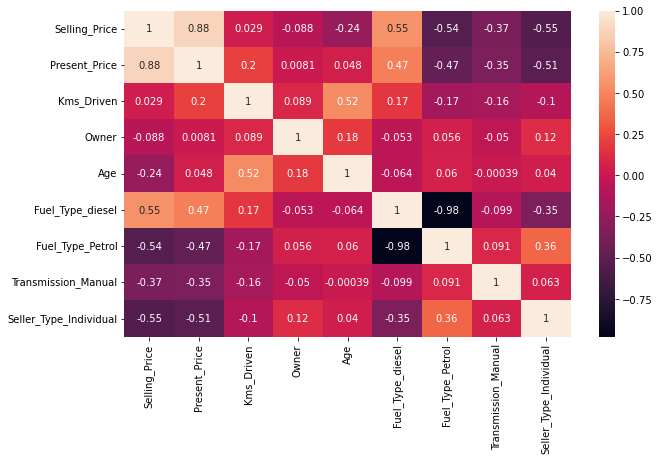

In [372]:
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [373]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Model Building (Linear Regression)

In [376]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [377]:
lm.fit(X_train, y_train)

LinearRegression()

In [378]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [379]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# Model Evaluation

In [380]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.888652,0.848981
mae,1.167580,1.216226
mse,2.943721,3.478804
rmse,1.715727,1.865155


# Regularization

# Ridge

In [381]:
from sklearn.linear_model import RidgeCV

In [382]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [383]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [384]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [385]:
ridge_cv_model.alpha_

0.01

In [386]:
ridge_cv_model.best_score_

-1.941061282302336

In [387]:
alpha_space2 = np.linspace(0.001, 0.01, 20)
alpha_space2

array([0.001     , 0.00147368, 0.00194737, 0.00242105, 0.00289474,
       0.00336842, 0.00384211, 0.00431579, 0.00478947, 0.00526316,
       0.00573684, 0.00621053, 0.00668421, 0.00715789, 0.00763158,
       0.00810526, 0.00857895, 0.00905263, 0.00952632, 0.01      ])

In [388]:
ridge_cv_model2 = RidgeCV(alphas=alpha_space2, cv = 5, scoring= "neg_root_mean_squared_error")

In [389]:
ridge_cv_model2.fit(X_train, y_train)

RidgeCV(alphas=array([0.001     , 0.00147368, 0.00194737, 0.00242105, 0.00289474,
       0.00336842, 0.00384211, 0.00431579, 0.00478947, 0.00526316,
       0.00573684, 0.00621053, 0.00668421, 0.00715789, 0.00763158,
       0.00810526, 0.00857895, 0.00905263, 0.00952632, 0.01      ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [390]:
ridge_cv_model2.alpha_

0.005263157894736842

In [391]:
ridge_cv_model2.best_score_

-1.9410607173037584

In [392]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [393]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.888652,0.848997
mae,1.167505,1.216166
mse,2.943723,3.478454
rmse,1.715728,1.865061


In [394]:
pd.concat([ls, rcs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test
R2,0.888652,0.848981,0.888652,0.848997
mae,1.167580,1.216226,1.167505,1.216166
mse,2.943721,3.478804,2.943723,3.478454
rmse,1.715727,1.865155,1.715728,1.865061


# Lasso

In [395]:
from sklearn.linear_model import Lasso, LassoCV

In [396]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [397]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [398]:
lasso_cv_model.alpha_

0.01

In [399]:
y_pred = lasso_cv_model.predict(X_test)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train)

In [400]:
lcv = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcv

,lasso_cv_train,lasso_cv_test
R2,0.888338,0.850792
mae,1.164409,1.207644
mse,2.952026,3.437098
rmse,1.718146,1.853941


In [401]:
pd.concat([ls, rcs, lcv], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.888652,0.848981,0.888652,0.848997,0.888338,0.850792
mae,1.167580,1.216226,1.167505,1.216166,1.164409,1.207644
mse,2.943721,3.478804,2.943723,3.478454,2.952026,3.437098
rmse,1.715727,1.865155,1.715728,1.865061,1.718146,1.853941


In [402]:
(lasso_cv_model.coef_ != 0).sum()

7

## Elastic-Net 

In [403]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [404]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [405]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [406]:
elastic_cv_model.alpha_

0.01

In [407]:
elastic_cv_model.l1_ratio_

0.1

In [408]:
y_pred = elastic_cv_model.predict(X_test)
y_train_pred = elastic_cv_model.predict(X_train)

In [409]:
ecv = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecv

,elastic_cv_train,elastic_cv_test
R2,0.888076,0.851100
mae,1.165710,1.206498
mse,2.958937,3.429990
rmse,1.720156,1.852023


In [410]:
pd.concat([ls, rcs, lcv, ecv], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
R2,0.888652,0.848981,0.888652,0.848997,0.888338,0.850792,0.888076,0.851100
mae,1.167580,1.216226,1.167505,1.216166,1.164409,1.207644,1.165710,1.206498
mse,2.943721,3.478804,2.943723,3.478454,2.952026,3.437098,2.958937,3.429990
rmse,1.715727,1.865155,1.715728,1.865061,1.718146,1.853941,1.720156,1.852023


In [411]:
ls_df = pd.DataFrame(lm.coef_, columns=["linear_model"])
rcs_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv"])
lcv_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_cv"])
ecv_df = pd.DataFrame(elastic_cv_model.coef_, columns=["lastic_model"])

In [412]:
pd.concat([ls_df, rcs_df, lcv_df, ecv_df], axis = 1)

,linear_model,ridge_cv,lasso_cv,lastic_model
0,0.429153,0.429191,0.433600,0.435283
1,-0.000006,-0.000006,-0.000006,-0.000006
2,-0.903760,-0.903206,-0.765526,-0.790430
3,-0.353801,-0.353851,-0.359126,-0.361099
4,2.533273,2.516195,1.726294,1.347429
5,0.738464,0.722058,-0.000000,-0.351950
6,-1.639022,-1.638265,-1.515861,-1.469155
7,-1.190593,-1.190019,-1.125126,-1.106634
